<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/big_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-09-12 03:27:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.93.0.142, 2600:1417:76:49f::e59, 2600:1417:76:485::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.93.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.1’

kagglecatsanddogs_3 100%[===================>] 786.68M  22.2MB/s    in 26s     

2019-09-12 03:27:29 (30.1 MB/s) - ‘kagglecatsanddogs_3367a.zip.1’ saved [824894548/824894548]



In [90]:
!ls -alh /tmp

total 8.0K
drwxr-xr-x 2 root root 4.0K Sep 12 03:29 .
drwxr-xr-x 1 root root 4.0K Sep 12 03:29 ..


In [0]:
import os
import zipfile

local_zip = 'kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [92]:
!ls /tmp/PetImages

Cat  Dog


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR="/tmp/PetImages"

CATEGORIES=["Dog","Cat"]
img_size=150

def create_training_data():
    for i in CATEGORIES:
        path=os.path.join(DATADIR,i)#print(path)
        class_num=CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_path=os.path.join(path,img)
                img_array=cv2.imread(img_path)
                #img_array=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                
                if img_array.shape[0]==img_array.shape[1]:
                  new_array=cv2.resize(img_array,(img_size,img_size))
                  #print('condition1')  
                elif img_array.shape[0]<img_array.shape[1]:
                  center0=int(img_array.shape[0]/2)
                  center1=int(img_array.shape[1]/2)
                  start0=0
                  end0=center0*2
                  start1=center1-center0
                  end1=center1+center0
                  #print('condition2')
                  new_array=img_array[start0:end0,start1:end1]
                  new_array=cv2.resize(img_array,(img_size,img_size)) 
                else:
                  center0=int(img_array.shape[0]/2)
                  center1=int(img_array.shape[1]/2)
                  start1=0
                  end1=center1*2
                  start0=center0-center1
                  end0=center0+center1
                  #print('condition3')
                  new_array=img_array[start0:end0,start1:end1]
                  new_array=cv2.resize(img_array,(img_size,img_size))    
                  
                cv2.imwrite(img_path, new_array)
                
                #training_data.append([new_array,class_num])

                #print(new_array)
                #print(new_array.shape)
                #plt.imshow(new_array,cmap="gray")
                #plt.show()
                #break
            #break
            
            except Exception as e:
                pass

create_training_data()

img_path="/tmp/PetImages/Dog/3661.jpg"
img=cv2.imread(img_path)
print(img.shape)

In [98]:
#Test
img_path="/tmp/PetImages/Dog/3661.jpg"
img_array=cv2.imread(img_path)
print(img_array.shape)

"""
img_size=150
print(img_array.shape)

if img_array.shape[0]==img_array.shape[1]:
  new_array=cv2.resize(img_array,(img_size,img_size))
  print('condition1')  
elif img_array.shape[0]<img_array.shape[1]:
  center0=int(img_array.shape[0]/2)
  center1=int(img_array.shape[1]/2)
  start0=0
  end0=center0*2
  start1=center1-center0
  end1=center1+center0
  print('condition2')
  new_array=img_array[start0:end0,start1:end1]
  new_array=cv2.resize(img_array,(img_size,img_size)) 
else:
  center0=int(img_array.shape[0]/2)
  center1=int(img_array.shape[1]/2)
  start1=0
  end1=center1*2
  start0=center0-center1
  end0=center0+center1
  print('condition3')
  new_array=img_array[start0:end0,start1:end1]
  new_array=cv2.resize(img_array,(img_size,img_size))               

#new_array=cv2.resize(img_array,(img_size,img_size))
print(new_array.shape)
"""

(150, 150, 3)


"\nimg_size=150\nprint(img_array.shape)\n\nif img_array.shape[0]==img_array.shape[1]:\n  new_array=cv2.resize(img_array,(img_size,img_size))\n  print('condition1')  \nelif img_array.shape[0]<img_array.shape[1]:\n  center0=int(img_array.shape[0]/2)\n  center1=int(img_array.shape[1]/2)\n  start0=0\n  end0=center0*2\n  start1=center1-center0\n  end1=center1+center0\n  print('condition2')\n  new_array=img_array[start0:end0,start1:end1]\n  new_array=cv2.resize(img_array,(img_size,img_size)) \nelse:\n  center0=int(img_array.shape[0]/2)\n  center1=int(img_array.shape[1]/2)\n  start1=0\n  end1=center1*2\n  start0=center0-center1\n  end0=center0+center1\n  print('condition3')\n  new_array=img_array[start0:end0,start1:end1]\n  new_array=cv2.resize(img_array,(img_size,img_size))               \n\n#new_array=cv2.resize(img_array,(img_size,img_size))\nprint(new_array.shape)\n"

In [0]:
!mkdir /tmp/validation

In [0]:
!mkdir /tmp/test

In [0]:
!mkdir /tmp/validation/cats

In [0]:
!mkdir /tmp/validation/dogs

In [104]:
!mkdir /tmp/test/cats

mkdir: cannot create directory ‘/tmp/test/cats’: File exists


In [0]:
!mkdir /tmp/test/dogs

In [0]:
!bash -c 'mv /tmp/PetImages/Cat/{0..1000}.jpg /tmp/validation/cats'
!bash -c 'mv /tmp/PetImages/Dog/{0..1000}.jpg /tmp/validation/dogs'

In [0]:
!bash -c 'mv /tmp/PetImages/Cat/{1001..1500}.jpg /tmp/test/cats'
!bash -c 'mv /tmp/PetImages/Dog/{1001..1500}.jpg /tmp/test/dogs'

              !bash -c 'mv /tmp/PetImages/Cat/{0..1000}.jpg /tmp/validation/cats'
              !ls /tmp/validation/cats
              
              !bash -c 'mv /tmp/PetImages/Dog/{0..1000}.jpg /tmp/validation/dogs'
              !ls /tmp/validation/dogs

In [0]:
base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'PetImages')
validation_dir = os.path.join(base_dir, 'validation')
test_dir=os.path.join(base_dir,'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Cat')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Dog')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

In [109]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['7878.jpg', '8515.jpg', '2853.jpg', '11476.jpg', '9063.jpg', '4427.jpg', '6188.jpg', '1800.jpg', '9601.jpg', '9563.jpg']
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


In [110]:
print ('total training cat images:', len(os.listdir(train_cats_dir)))
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print ('total test cat images:',len(os.listdir(test_cats_dir)))
print ('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 11000
total training dog images: 11000
total validation cat images: 1001
total validation dog images: 1001
total test cat images: 500
total test dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

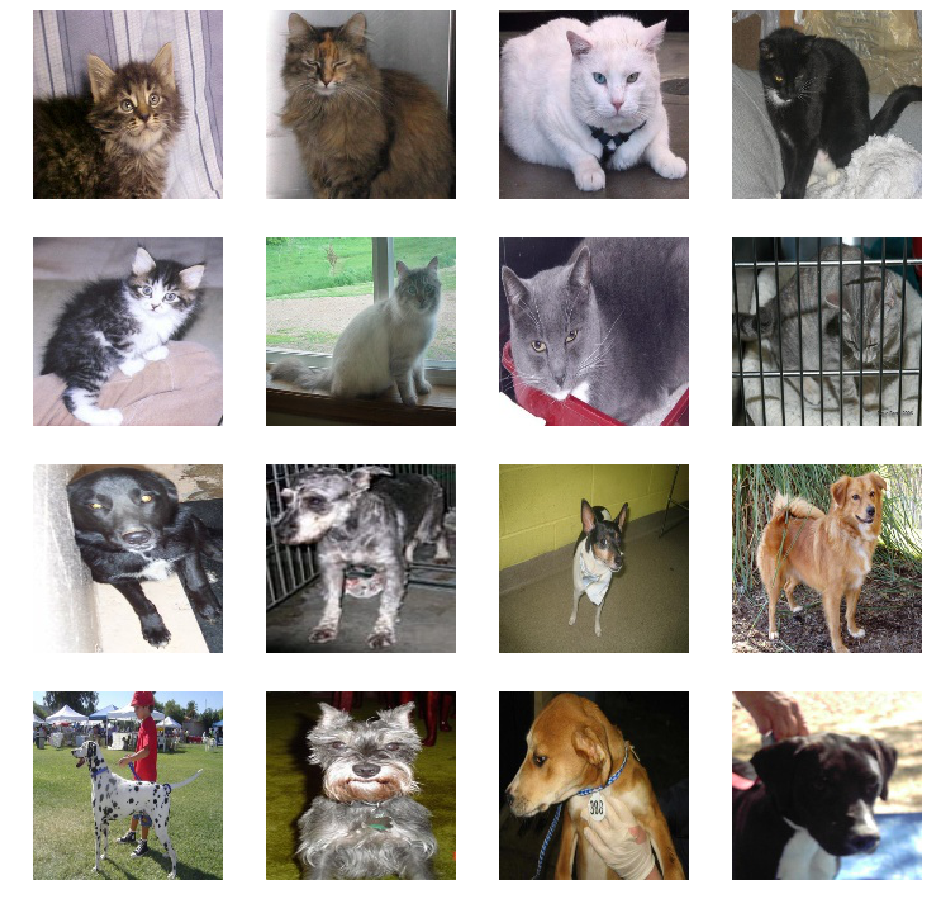

In [112]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 21998 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [0]:
!rm /tmp/PetImages/Dog/11702.jpg

In [0]:
!rm /tmp/validation/cats/666.jpg

In [116]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 21997 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
___________________________________________________

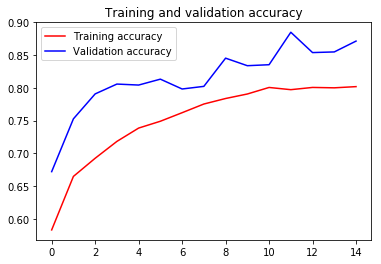

<Figure size 432x288 with 0 Axes>

In [117]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()